In [1]:
import pandas as pd
import pickle
import glob
import re

from copy import deepcopy

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
!ls ./pickles_for_project/list_df_names.pkl

./pickles_for_project/list_df_names.pkl


In [5]:
df_name_list = pickle.load(open( "./pickles_for_project/list_df_names.pkl", "rb" ) )

In [6]:
for _df in df_name_list:
    exec( _df + " = pd.read_pickle('./pickles_for_project/" + _df + ".pkl')")

In [49]:
df_name_list

['df_drimpair',
 'df_cevent',
 'df_damage',
 'df_vsoe',
 'df_miper',
 'df_accident',
 'df_nmcrash',
 'df_nmimpair',
 'df_person',
 'df_vindecode',
 'df_violatn',
 'df_parkwork',
 'df_distract',
 'df_maneuver',
 'df_safetyeq',
 'df_miacc',
 'df_pbtype',
 'df_midrvacc',
 'df_factor',
 'df_vevent',
 'df_vision',
 'df_nmprior',
 'df_vehicle']

GPS Coordinate Bounds:

UL Woodstock (42.29632,-88.4317)
LL Lisbon (41.47434,-88.4770)
LR Chicago Heights (41.465,-87.5322)

IL_bound UL (42.483,-91.69

In [8]:
df_accident.shape

(32166, 52)

In [39]:
df_accident['LATITUDE'].max()

99.999899999999997

(array([  3.19590000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.80000000e+01,
          1.89000000e+02]),
 array([-166.54955556,  -49.89461   ,   66.76033555,  183.41528111,
         300.07022666,  416.72517222,  533.38011778,  650.03506333,
         766.69000889,  883.34495444,  999.9999    ]),
 <a list of 10 Patch objects>)

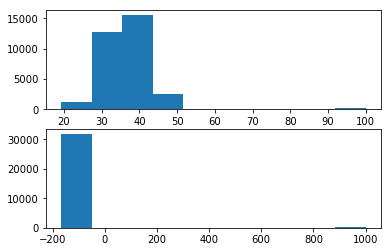

In [11]:
plt.subplot(2,1,1)
plt.hist(df_accident['LATITUDE'])
plt.subplot(2,1,2)
plt.hist(df_accident['LONGITUD'])

In [35]:
list(df_vehicle.columns)

['STATE',
 'ST_CASE',
 'VEH_NO',
 'VE_FORMS',
 'NUMOCCS',
 'DAY',
 'MONTH',
 'HOUR',
 'MINUTE',
 'HARM_EV',
 'MAN_COLL',
 'UNITTYPE',
 'HIT_RUN',
 'REG_STAT',
 'OWNER',
 'MAKE',
 'MODEL',
 'MAK_MOD',
 'BODY_TYP',
 'MOD_YEAR',
 'VIN',
 'VIN_1',
 'VIN_2',
 'VIN_3',
 'VIN_4',
 'VIN_5',
 'VIN_6',
 'VIN_7',
 'VIN_8',
 'VIN_9',
 'VIN_10',
 'VIN_11',
 'VIN_12',
 'TOW_VEH',
 'J_KNIFE',
 'MCARR_I1',
 'MCARR_I2',
 'MCARR_ID',
 'GVWR',
 'V_CONFIG',
 'CARGO_BT',
 'HAZ_INV',
 'HAZ_PLAC',
 'HAZ_ID',
 'HAZ_CNO',
 'HAZ_REL',
 'BUS_USE',
 'SPEC_USE',
 'EMER_USE',
 'TRAV_SP',
 'UNDERIDE',
 'ROLLOVER',
 'ROLINLOC',
 'IMPACT1',
 'DEFORMED',
 'TOWED',
 'M_HARM',
 'VEH_SC1',
 'VEH_SC2',
 'FIRE_EXP',
 'DR_PRES',
 'L_STATE',
 'DR_ZIP',
 'L_STATUS',
 'L_TYPE',
 'CDL_STAT',
 'L_ENDORS',
 'L_COMPL',
 'L_RESTRI',
 'DR_HGT',
 'DR_WGT',
 'PREV_ACC',
 'PREV_SUS',
 'PREV_DWI',
 'PREV_SPD',
 'PREV_OTH',
 'FIRST_MO',
 'FIRST_YR',
 'LAST_MO',
 'LAST_YR',
 'SPEEDREL',
 'DR_SF1',
 'DR_SF2',
 'DR_SF3',
 'DR_SF4',
 'VTRAFWA

In [120]:
all_states = """Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming""".split('\n')

all_states.insert(46,'Virgin Islands')
all_states.insert(38,'Puerto Rico')
all_states.insert(8,'District of Columbia')
all_states

state_codes = list(range(1,57))
for not_present in [3,7,14]:
    state_codes.remove(not_present)

state_code_dict = {}
for code,state in zip(state_codes,all_states):
    state_code_dict[code]=state
    
# for key,value in state_code_dict.items():
#     print(key,": ",value)

In [48]:
print(valid_gps_df.shape,valid_gps_df_plus_reg_state.shape)

(31814, 52) (48431, 53)


In [123]:
valid_gps_df_plus_reg_state = pd.merge(valid_gps_df,df_vehicle.loc[:,['ST_CASE','REG_STAT']],left_on='ST_CASE',right_on='ST_CASE',how='left')
valid_gps_df_plus_reg_state.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR,REG_STAT
0,1,10001,1,1,0,0,0,1,1,127,...,2,58,88,88,0,0,0,1,1,1
1,1,10002,1,1,0,0,0,1,1,83,...,22,20,88,88,0,0,0,1,0,1
2,1,10003,1,1,0,0,0,2,2,11,...,1,45,99,99,0,0,0,1,1,1
3,1,10004,1,1,0,0,0,1,1,45,...,1,15,88,88,0,0,0,1,1,12
4,1,10005,2,2,0,0,0,2,2,45,...,7,16,88,88,0,0,0,1,0,1


In [122]:
valid_gps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31814 entries, 0 to 32165
Data columns (total 52 columns):
STATE         31814 non-null int64
ST_CASE       31814 non-null int64
VE_TOTAL      31814 non-null int64
VE_FORMS      31814 non-null int64
PVH_INVL      31814 non-null int64
PEDS          31814 non-null int64
PERNOTMVIT    31814 non-null int64
PERMVIT       31814 non-null int64
PERSONS       31814 non-null int64
COUNTY        31814 non-null int64
CITY          31814 non-null int64
DAY           31814 non-null int64
MONTH         31814 non-null int64
YEAR          31814 non-null int64
DAY_WEEK      31814 non-null int64
HOUR          31814 non-null int64
MINUTE        31814 non-null int64
NHS           31814 non-null int64
RUR_URB       31814 non-null int64
FUNC_SYS      31814 non-null int64
RD_OWNER      31814 non-null int64
ROUTE         31814 non-null int64
TWAY_ID       31814 non-null object
TWAY_ID2      8350 non-null object
MILEPT        31814 non-null int64
LATITUDE      3

In [15]:
valid_gps_df = deepcopy(df_accident)
# valid_gps_df = valid_gps_df[valid_gps_df.LATITUDE<70]
valid_gps_df = valid_gps_df[valid_gps_df.LATITUDE<52]
valid_gps_df = valid_gps_df[valid_gps_df.LONGITUD<0]
valid_gps_df = valid_gps_df[valid_gps_df.LONGITUD>-130]

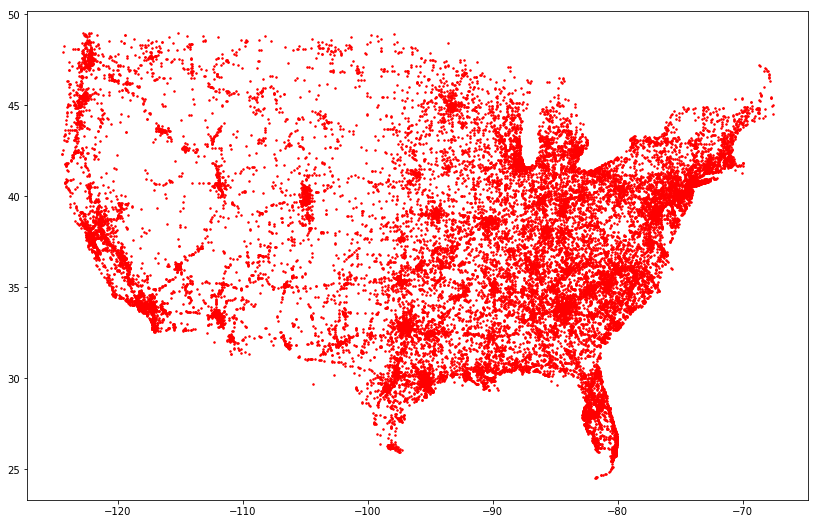

In [73]:
valid_gps_df

plt.figure(figsize=(14,9))
plt.plot(valid_gps_df.LONGITUD,valid_gps_df.LATITUDE,'ro',markersize=1.5)

In [66]:
state_different_registration_crash = valid_gps_df_plus_reg_state[valid_gps_df_plus_reg_state['STATE']!=valid_gps_df_plus_reg_state['REG_STAT']]
state_different_registration_crash.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR,REG_STAT
3,1,10004,1,1,0,0,0,1,1,45,...,1,15,88,88,0,0,0,1,1,12
8,1,10008,1,1,0,1,1,1,1,73,...,21,48,99,99,0,0,0,1,0,99
28,1,10021,2,2,0,0,0,4,4,115,...,14,5,99,99,27,0,0,1,0,13
29,1,10022,1,1,0,0,0,2,2,127,...,6,30,99,99,0,0,0,1,0,13
31,1,10024,1,1,0,0,0,1,1,5,...,6,25,99,99,0,0,0,1,0,13


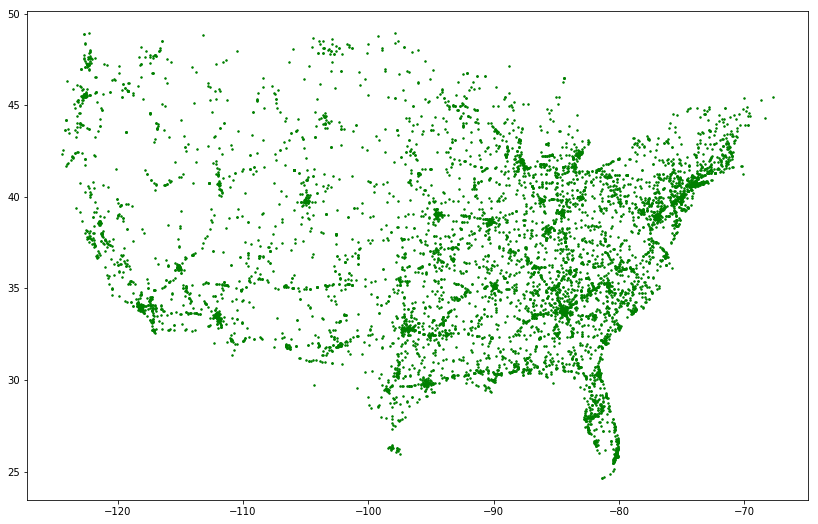

In [74]:
# out-of-state crashes
plt.figure(figsize=(14,9))
plt.plot(state_different_registration_crash.LONGITUD,state_different_registration_crash.LATITUDE,'go',markersize=1.5)

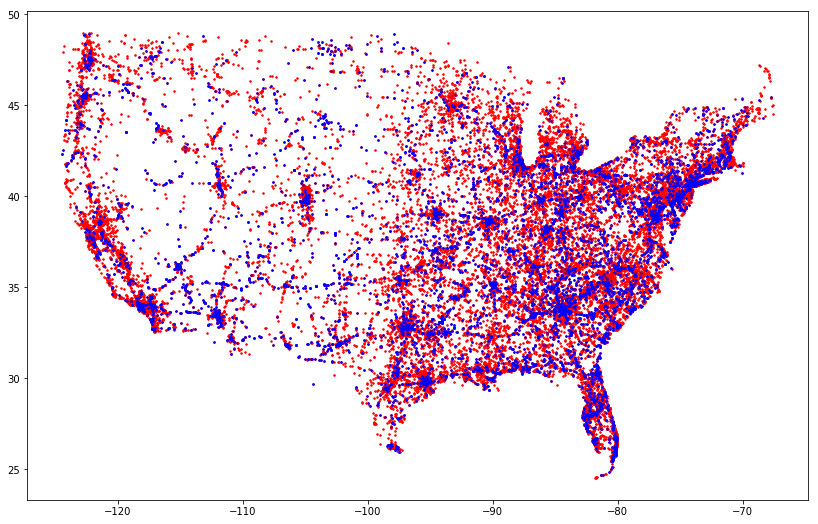

In [76]:
#out of state super-imposed on in-state

plt.figure(figsize=(14,9))
plt.plot(valid_gps_df.LONGITUD,valid_gps_df.LATITUDE,'ro',markersize=1.5)
plt.plot(state_different_registration_crash.LONGITUD,state_different_registration_crash.LATITUDE,'bo',markersize=1.5)

In [137]:
out_of_state_crashes = pd.DataFrame(state_different_registration_crash.STATE.value_counts())
all_crashes = pd.DataFrame(valid_gps_df_plus_reg_state.STATE.value_counts())

In [138]:
out_to_in_crash_ratio

,STATE_outofstate,STATE_instate,Ratio
48,668,4891,0.136577
12,457,4165,0.109724
13,430,2041,0.210681
6,389,4417,0.088069
29,288,1233,0.233577
4,282,1146,0.246073
42,256,1679,0.152472
37,253,1932,0.130952
47,251,1358,0.184831
45,250,1406,0.177809


In [151]:
#proportion of accidents involving out of staters to in staters
out_to_in_crash_ratio = pd.merge(out_of_state_crashes,all_crashes,left_index=True,right_index=True,suffixes=('_outofstate','_instate'))
out_to_in_crash_ratio['State_code'] = out_to_in_crash_ratio.index
out_to_in_crash_ratio['State_full_form']= out_to_in_crash_ratio.State_code.map(lambda x: state_code_dict[x])
out_to_in_crash_ratio['Ratio'] = out_to_in_crash_ratio.STATE_outofstate/out_to_in_crash_ratio.STATE_instate
out_to_in_crash_ratio = out_to_in_crash_ratio.sort_values('Ratio',ascending=True)

In [152]:
out_to_in_crash_ratio

,STATE_outofstate,STATE_instate,State_code,State_full_form,Ratio
6,389,4417,6,California,0.088069
12,457,4165,12,Florida,0.109724
25,44,397,25,Massachusetts,0.110831
26,160,1439,26,Michigan,0.111188
53,89,789,53,Washington,0.112801
27,67,592,27,Minnesota,0.113176
23,22,190,23,Maine,0.115789
37,253,1932,37,North Carolina,0.130952
28,116,873,28,Mississippi,0.132875
17,182,1361,17,Illinois,0.133725


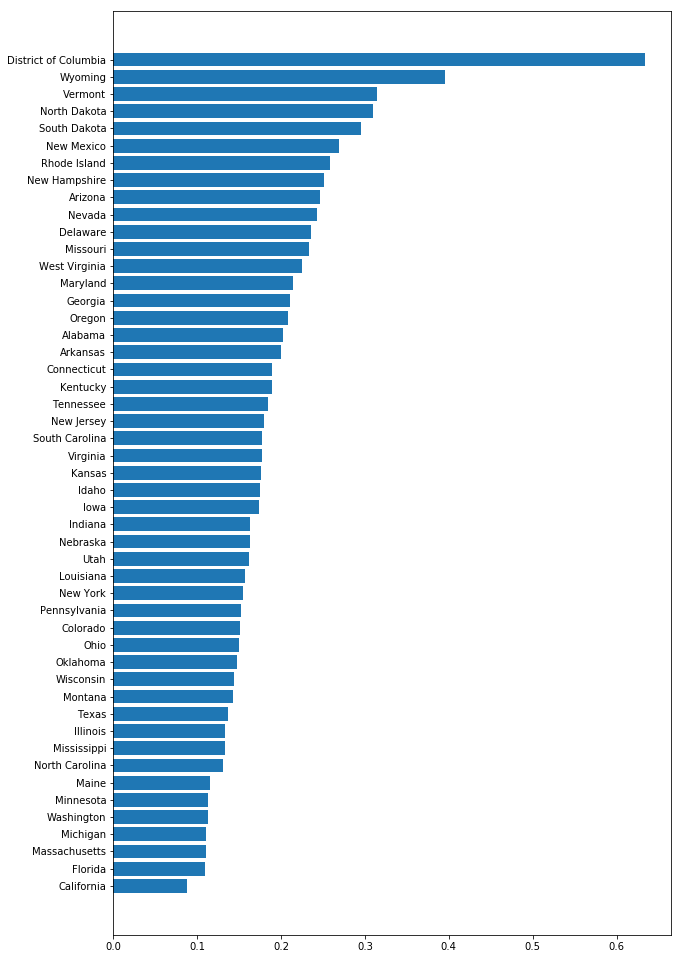

In [155]:
plt.figure(figsize=(10,17))
plt.barh(range(len(out_to_in_crash_ratio.State_full_form)),out_to_in_crash_ratio.Ratio)
plt.yticks(range(len(out_to_in_crash_ratio.State_full_form)),out_to_in_crash_ratio.State_full_form);

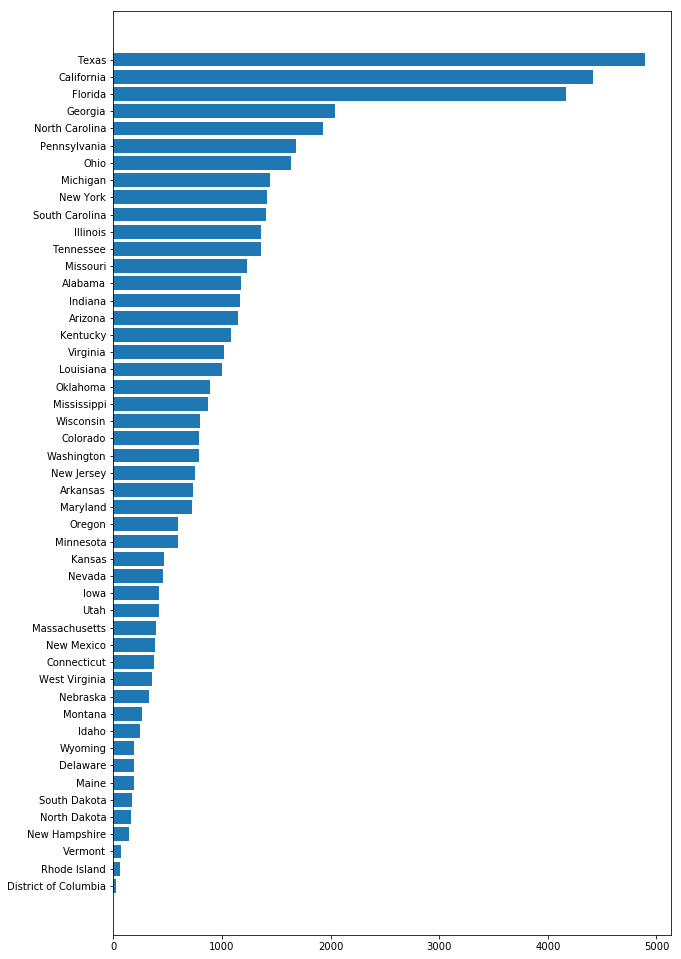

In [157]:
plt.figure(figsize=(10,17))
out_to_in_crash_ratio = out_to_in_crash_ratio.sort_values('STATE_instate')
plt.barh(range(len(out_to_in_crash_ratio.State_full_form)),out_to_in_crash_ratio.STATE_instate)
plt.yticks(range(len(out_to_in_crash_ratio.State_full_form)),out_to_in_crash_ratio.State_full_form);

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56]

In [83]:
pd.DataFrame(out_of_state_crashes).merge()

1     238
4     282
5     147
6     389
8     119
9      71
10     45
11     19
12    457
13    430
16     43
17    182
18    190
19     73
20     82
21    204
22    158
23     22
24    155
25     44
26    160
27     67
28    116
29    288
30     38
31     54
32    110
33     36
34    136
35    103
36    219
37    253
38     52
39    245
40    131
41    124
42    256
44     15
45    250
46     50
47    251
48    668
49     68
50     22
51    180
53     89
54     80
55    115
56     76
Name: STATE, dtype: int64

In [26]:
df_accident[df_accident['LATITUDE']<=71].shape

(31959, 52)

In [18]:
df_vevent

,STATE,ST_CASE,EVENTNUM,VEH_NO,VEVENTNUM,VNUMBER1,AOI1,SOE,VNUMBER2,AOI2
0,1,10001,1,1,1,1,55,63,5555,55
1,1,10001,2,1,2,1,12,35,9999,77
2,1,10001,3,1,3,1,55,67,5555,55
3,1,10001,4,1,4,1,12,42,9999,77
4,1,10002,1,1,1,1,55,64,5555,55
5,1,10002,2,1,2,1,6,34,9999,77
6,1,10002,3,1,3,1,6,24,9999,77
7,1,10002,4,1,4,1,0,1,9999,77
8,1,10003,1,1,1,1,55,63,5555,55
9,1,10003,2,1,2,1,12,42,9999,77


In [55]:
df_accident['LONGITUD'].min()

-166.54955555999999

In [26]:
bound_df = df_accident[df_accident['LATITUDE']<=42.2963]

In [27]:
bound_df.shape

(27788, 52)

In [28]:
bound_df = bound_df[bound_df['LATITUDE']>=41.4743]

In [29]:
bound_df.shape

(1641, 52)

In [30]:
bound_df = bound_df[bound_df['LONGITUD']>=-88.477]

In [32]:
bound_df.shape

(1333, 52)

In [33]:
bound_df = bound_df[bound_df['LONGITUD']<=-87.532]

In [56]:
bound_df.shape

(330, 52)

In [64]:
df_accident[df_accident.LONGITUD>61].shape

(207, 52)

(array([  3.19590000e+04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.80000000e+01,
          1.89000000e+02]),
 array([-166.54955556,  -49.89461   ,   66.76033555,  183.41528111,
         300.07022666,  416.72517222,  533.38011778,  650.03506333,
         766.69000889,  883.34495444,  999.9999    ]),
 <a list of 10 Patch objects>)

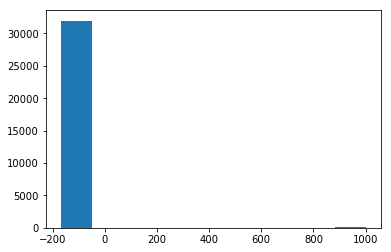

In [61]:
plt.hist(df_accident.LONGITUD)

(array([  1.00000000e+00,   1.99400000e+03,   2.41900000e+03,
          1.29400000e+03,   1.33500000e+03,   4.47400000e+03,
          4.83100000e+03,   8.50100000e+03,   5.41700000e+03,
          1.54900000e+03]),
 array([-132.93291944, -126.39957944, -119.86623944, -113.33289944,
        -106.79955944, -100.26621944,  -93.73287944,  -87.19953944,
         -80.66619944,  -74.13285944,  -67.59951944]),
 <a list of 10 Patch objects>)

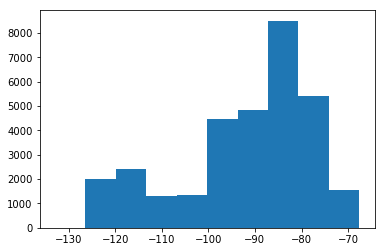

In [73]:
t1 = df_accident[df_accident.LONGITUD<=0]
t1 = t1[t1.LONGITUD>=-140]
plt.hist(t1.LONGITUD)

(array([  1.16900000e+03,   1.27240000e+04,   1.55470000e+04,
          2.45900000e+03,   3.00000000e+00,   5.70000000e+01,
          0.00000000e+00,   1.80000000e+01,   1.00000000e+00,
          1.88000000e+02]),
 array([ 19.27305 ,  27.345735,  35.41842 ,  43.491105,  51.56379 ,
         59.636475,  67.70916 ,  75.781845,  83.85453 ,  91.927215,  99.9999  ]),
 <a list of 10 Patch objects>)

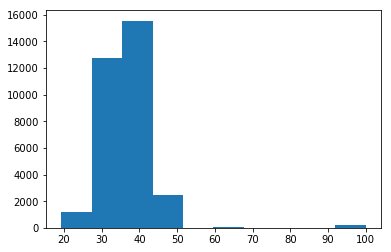

In [65]:
plt.hist(df_accident.LATITUDE)

In [58]:
bound_df.STATE.unique()

array([17])

types of w

(array([  2.53680000e+04,   1.00000000e+02,   3.18000000e+02,
          4.02000000e+02,   2.30000000e+01,   1.30000000e+01,
          5.90000000e+01,   0.00000000e+00,   5.48100000e+03,
          4.70000000e+01]),
 array([  1. ,   2.1,   3.2,   4.3,   5.4,   6.5,   7.6,   8.7,   9.8,
         10.9,  12. ]),
 <a list of 10 Patch objects>)

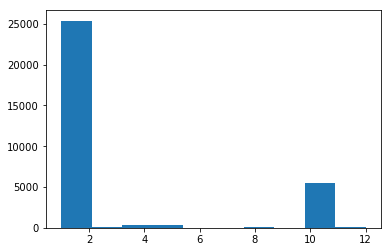

In [77]:
plt.hist(df_accident.WEATHER[df_accident.WEATHER<20])

In [7]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32166 entries, 0 to 32165
Data columns (total 52 columns):
STATE         32166 non-null int64
ST_CASE       32166 non-null int64
VE_TOTAL      32166 non-null int64
VE_FORMS      32166 non-null int64
PVH_INVL      32166 non-null int64
PEDS          32166 non-null int64
PERNOTMVIT    32166 non-null int64
PERMVIT       32166 non-null int64
PERSONS       32166 non-null int64
COUNTY        32166 non-null int64
CITY          32166 non-null int64
DAY           32166 non-null int64
MONTH         32166 non-null int64
YEAR          32166 non-null int64
DAY_WEEK      32166 non-null int64
HOUR          32166 non-null int64
MINUTE        32166 non-null int64
NHS           32166 non-null int64
RUR_URB       32166 non-null int64
FUNC_SYS      32166 non-null int64
RD_OWNER      32166 non-null int64
ROUTE         32166 non-null int64
TWAY_ID       32166 non-null object
TWAY_ID2      8400 non-null object
MILEPT        32166 non-null int64
LATITUDE      3

In [11]:
just_weather_df = df_accident.loc[:,['LGT_COND','WEATHER','WEATHER1','WEATHER2']]

In [81]:
just_weather_df.groupby(by=['WEATHER']).count()

,LGT_COND,WEATHER1,WEATHER2
WEATHER,,,
1,22904,22904,22904
2,2464,2464,2464
3,100,100,100
4,318,318,318
5,402,402,402
6,23,23,23
7,13,13,13
8,59,59,59
10,5481,5481,5481


In [ ]:
just_day_of_week = 

In [80]:
df_vevent.shape

(115275, 10)

In [168]:
state_code_dict

{1: 'Alabama',
 2: 'Alaska',
 4: 'Arizona',
 5: 'Arkansas',
 6: 'California',
 8: 'Colorado',
 9: 'Connecticut',
 10: 'Delaware',
 11: 'District of Columbia',
 12: 'Florida',
 13: 'Georgia',
 15: 'Hawaii',
 16: 'Idaho',
 17: 'Illinois',
 18: 'Indiana',
 19: 'Iowa',
 20: 'Kansas',
 21: 'Kentucky',
 22: 'Louisiana',
 23: 'Maine',
 24: 'Maryland',
 25: 'Massachusetts',
 26: 'Michigan',
 27: 'Minnesota',
 28: 'Mississippi',
 29: 'Missouri',
 30: 'Montana',
 31: 'Nebraska',
 32: 'Nevada',
 33: 'New Hampshire',
 34: 'New Jersey',
 35: 'New Mexico',
 36: 'New York',
 37: 'North Carolina',
 38: 'North Dakota',
 39: 'Ohio',
 40: 'Oklahoma',
 41: 'Oregon',
 42: 'Pennsylvania',
 43: 'Puerto Rico',
 44: 'Rhode Island',
 45: 'South Carolina',
 46: 'South Dakota',
 47: 'Tennessee',
 48: 'Texas',
 49: 'Utah',
 50: 'Vermont',
 51: 'Virginia',
 52: 'Virgin Islands',
 53: 'Washington',
 54: 'West Virginia',
 55: 'Wisconsin',
 56: 'Wyoming'}

In [167]:
valid_gps_df['YEAR'].value_counts()

2015    31814
Name: YEAR, dtype: int64

In [165]:
valid_gps_df.STATE[valid_gps_df['STATE']==6].value_counts()

6    2925
Name: STATE, dtype: int64